# PM2.5 predication —— 何数学

## 回归，手写梯度下降

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### >> 读入数据

In [3]:
data = pd.read_csv('./dataset/train.csv')
predict_data = pd.read_csv('./dataset/test.csv',
                           header = None)

In [4]:
data.head()

,Date,Observation item,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,AMB_TEMP,14,14,14,13,12,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [5]:
predict_data.head()

,0,1,2,3,4,5,6,7,8,9
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1


### >> 数据预处理
* NR的RAINFALL，当作0处理（即未下雨）(已检查过NR仅出现在RAINFALL字段中)
* 数字的类型原为str,转为float

In [6]:
type(data.iloc[3,3]) # 查看原有数据的存储格式

str

In [7]:
def handle_data(df):
    df = df.replace('NR',0)
    df.iloc[:,2:] = df.iloc[:,2:].astype('float')
    return df
data = handle_data(data)
predict_data = handle_data(predict_data)

In [8]:
type(data.iloc[3,3]) # 检查转换完的数据格式已经为float

float

In [9]:
data.head(11)

,Date,Observation item,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,AMB_TEMP,14,14,14,13,12,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,7.8,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,9.9,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,O3,16,30,27,23,24,28,24,22,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,PM10,56,50,48,35,25,12,4,2,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,PM2.5,26,39,36,35,31,28,25,20,...,36,45,42,49,45,44,41,30,24,13


In [10]:
predict_data.head(11)

,0,1,2,3,4,5,6,7,8,9
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1
5,id_0,NO2,17,14,13,14,18,21,8.9,9.4
6,id_0,NOx,18,16,14,15,20,23,10,10
7,id_0,O3,32,31,31,26,16,12,27,20
8,id_0,PM10,62,50,44,39,38,32,48,36
9,id_0,PM2.5,33,39,39,25,18,18,17,9


### >> 数据可视化
某一天内18个变量值的走势图。超出100的两个变量为WD_HR，WD_DIREC，参考价值不太大，因此纵坐标范围设置为0~100。

Text(0.5, 0, 'time')

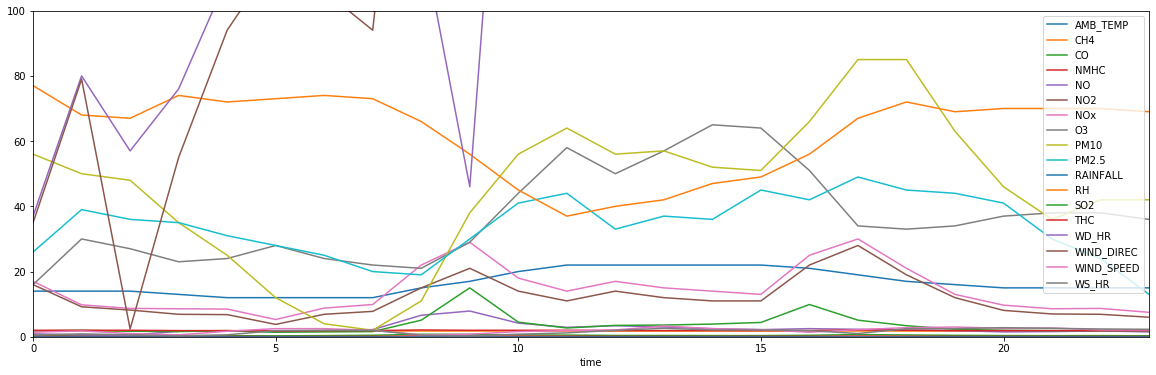

In [11]:
sample = data[data['Date']== '2014/1/1'].T.iloc[2:,] # 取第一天的空气指标可视化
item_list = data['Observation item'].unique() # 检测指标list
sample.columns = item_list
sample.plot(ylim=[0,100],figsize=[20,6]).set_xlabel('time')

### >> 数据格式整理。将每日的数据分为3个时段，产生3个样本。
认为各变量的时序影响有限，不超过8小时。因此对于每日24小时，每八小时的数据作为一个样本，可认为样本之间是独立的。

因变量：每日第8次观测、第16次观测、第24次观测的PM 2.5的值（对应的column名为7、15、23）   
自变量：所有18个变量在每日第8、16、24次观测前的4个时间点的观测值（对应的column名为['3', '4', '5', '6', '11', '12', '13', '14', '19', '20', '21', '22']），相当于18*4=72个自变量。

In [12]:
X_list = list(item_list)
# X_list.remove('PM2.5')
X_col = []
time = 4

print("样本数为：%s"%(int(data.shape[0] / item_list.shape[0] * 3)))

for x in X_list: # 每个空气指标产生7个不同观测时间的变量
    for k in range(time):
        X_col.append(x+':'+str(-time+k)) # -1、-2、-3、-4分别为观测前的1、2、3、4个小时
print('\n自变量共',len(X_list) * time,'个,','分别为（后缀 -1、-2、-3、-4分别为观测前的1、2、3、4个小时）：\n\n',X_col)

样本数为：720

自变量共 72 个, 分别为（后缀 -1、-2、-3、-4分别为观测前的1、2、3、4个小时）：

 ['AMB_TEMP:-4', 'AMB_TEMP:-3', 'AMB_TEMP:-2', 'AMB_TEMP:-1', 'CH4:-4', 'CH4:-3', 'CH4:-2', 'CH4:-1', 'CO:-4', 'CO:-3', 'CO:-2', 'CO:-1', 'NMHC:-4', 'NMHC:-3', 'NMHC:-2', 'NMHC:-1', 'NO:-4', 'NO:-3', 'NO:-2', 'NO:-1', 'NO2:-4', 'NO2:-3', 'NO2:-2', 'NO2:-1', 'NOx:-4', 'NOx:-3', 'NOx:-2', 'NOx:-1', 'O3:-4', 'O3:-3', 'O3:-2', 'O3:-1', 'PM10:-4', 'PM10:-3', 'PM10:-2', 'PM10:-1', 'PM2.5:-4', 'PM2.5:-3', 'PM2.5:-2', 'PM2.5:-1', 'RAINFALL:-4', 'RAINFALL:-3', 'RAINFALL:-2', 'RAINFALL:-1', 'RH:-4', 'RH:-3', 'RH:-2', 'RH:-1', 'SO2:-4', 'SO2:-3', 'SO2:-2', 'SO2:-1', 'THC:-4', 'THC:-3', 'THC:-2', 'THC:-1', 'WD_HR:-4', 'WD_HR:-3', 'WD_HR:-2', 'WD_HR:-1', 'WIND_DIREC:-4', 'WIND_DIREC:-3', 'WIND_DIREC:-2', 'WIND_DIREC:-1', 'WIND_SPEED:-4', 'WIND_SPEED:-3', 'WIND_SPEED:-2', 'WIND_SPEED:-1', 'WS_HR:-4', 'WS_HR:-3', 'WS_HR:-2', 'WS_HR:-1']


In [13]:
print('因变量选取的列名：',['7','15','23'])
y = np.asarray(data[data['Observation item'] == 'PM2.5'][['7','15','23']]).reshape(-1,1) # 因变量
y = [num[0] for num in y]

X = pd.DataFrame(columns=X_col)
tmp_rv_list = []
for i in range(3):
    tmp_rv_list += [ str(x) for x in list(range(8*(i+1) - time -1, 8*(i+1) -1)) ]
print('自变量选取的列名：',tmp_rv_list)
needed = data[tmp_rv_list]

for i in range(int(data.shape[0] / item_list.shape[0])): # 从原始数据获得自变量的数据列表
    tmp_data = needed.iloc[18*i:18*(i+1),:]
    for k in range(3):
        tmp_row = np.asarray(tmp_data.iloc[:,time*k:time*(k+1)]).reshape(1,-1)
        X= X.append(pd.DataFrame(tmp_row,columns=X_col))
        
X.head()

因变量选取的列名： ['7', '15', '23']
自变量选取的列名： ['3', '4', '5', '6', '11', '12', '13', '14', '19', '20', '21', '22']


,AMB_TEMP:-4,AMB_TEMP:-3,AMB_TEMP:-2,AMB_TEMP:-1,CH4:-4,CH4:-3,CH4:-2,CH4:-1,CO:-4,CO:-3,...,WIND_DIREC:-2,WIND_DIREC:-1,WIND_SPEED:-4,WIND_SPEED:-3,WIND_SPEED:-2,WIND_SPEED:-1,WS_HR:-4,WS_HR:-3,WS_HR:-2,WS_HR:-1
0,13,12,12,12,1.8,1.8,1.8,1.8,0.37,0.35,...,116,106,0.6,1.7,2.5,2.5,0.3,0.6,1.9,2
0,22,22,22,22,1.8,1.8,1.8,1.8,0.52,0.41,...,316,313,1.9,2.1,3.3,2.5,1.2,2,2.6,2.1
0,16,15,15,15,1.8,1.8,1.8,1.8,0.45,0.38,...,108,102,3,2.6,2.7,2.1,2.5,2.8,2.6,2.4
0,14,14,15,16,1.8,1.8,1.8,1.8,0.27,0.24,...,79,252,2.3,1.5,1,0.8,2.7,2,0.5,0.8
0,23,24,24,24,1.8,1.8,1.8,1.8,0.37,0.43,...,283,283,2,2.9,2.5,1.9,1.2,2.6,2.2,1.6


In [14]:
print(len(y))
print(X.shape)

720
(720, 72)


#### 自变量的核密度估计图（部分）

Text(0.5, 1.0, '(incomplete) kdeplot of independent variables')

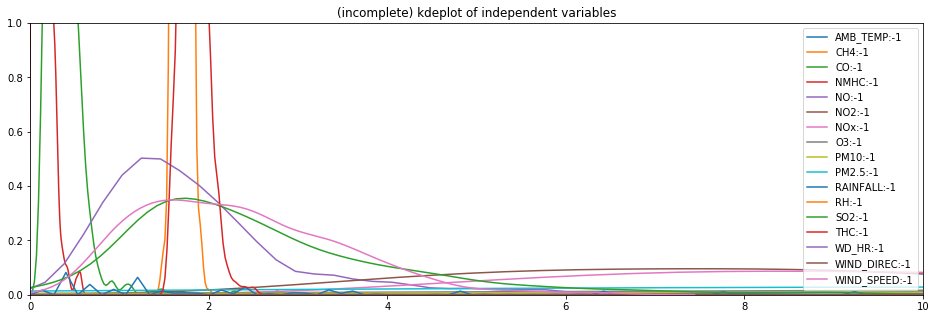

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.axis([0,10,0,1])
for i in range(17):
    sns.kdeplot(X.iloc[:,time*(i+1)-1]) # 每种空气指标只查看一次核密度估计图
plt.title('(incomplete) kdeplot of independent variables')

#### 因变量的核密度估计图

Text(0.5, 1.0, 'kdeplot of PM2.5')

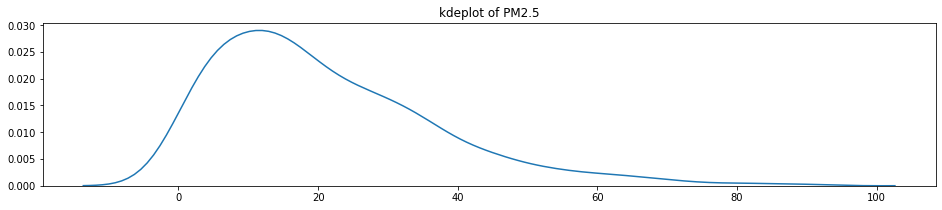

In [16]:
plt.figure(figsize=(16,3))
sns.kdeplot(y)
plt.title('kdeplot of PM2.5')

可以看出因变量与许多自变量都是偏态的正态分布，且分布范围差异较大，因此在后续的数据处理部分采用StandardScaler（去均值、除以标准差）。

### >> 将数据归一化，分为训练集与测试集

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
std_X = ss.fit_transform(X)
# origin_data = ss.inverse_transform(std_data)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_X, np.asarray(y), random_state=0)

### >> 梯度下降求解

$h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\ldots+\theta_{m} x_{m}$，记为 $h_{\theta}(x)=\theta^{T} X$

由于自变量之间具有时序性，即时序上连续的自变量存在强相关，导致$X^{T}X$存在若干接近于0的特征值，损害其可逆性，最终使参数估计值不稳定。因此采用岭回归，使得$X^{T}X$特征值远离0,也即加入L2正则化，此时loss function为:

$J(\theta)=\frac{1}{2 n} \sum_{i=1}^{n}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+ \frac{\lambda}{2} \sum_{j=1}^{m} \theta_{j}^{2}$

设普通梯度下降中学习率为$\alpha$，迭代的公式如下：

$\theta_{0}:=\theta_{0}-a \frac{1}{n} \sum_{i=1}^{n}\left(\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{0}^{(i)}\right)$


$\theta_{j}:=\theta_{j}-a\left[\frac{1}{n} \sum_{i=1}^{n}\left(\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}+\frac{\lambda}{n} \theta_{j}\right]\right.  =\theta_{j}\left(1-a \frac{\lambda}{n}\right)-a \frac{1}{n} \sum_{i=1}^{n}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$，for $j=1,2, \dots m$

写成矩阵形式为：
$\theta:=\theta\left(1-\alpha \frac{\lambda}{n}\right)- \frac{1}{n} \alpha X^{T}(X \theta-Y)$

这里学习率$\alpha$的改进方式采用Adagrad。

In [19]:
n_samples, n_features = X_train.shape 

X_train_1 = np.concatenate((np.ones(n_samples).reshape((n_samples, 1)), X_train), axis=1)  # 对X添加一列1
y_train = y_train.reshape((n_samples, 1))

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# adagrad

# 计算当前loss值（不包含正则项）
def cal_loss(X, y, n, theta): 
    ans = sum((X @ theta - y)**2) / n / 2
    return ans[0]

# 计算梯度，累加梯度平方
def cal_gradient(X, y, n_samples, theta, lamda): 
    global grad2_sum
    ans = lamda / n_samples * theta + 1/n_samples * X.T @ (X @ theta - y)
    grad2_sum += ans**2 
    return ans, grad2_sum

# 更新参数
def update_theta(X, y, n, theta, lamda, alpha):
    gradient, grad2_sum = cal_gradient(X, y, n, theta, lamda)
    ans = theta - alpha * gradient / np.sqrt(grad2_sum)
    return ans

def optimizer(this_lamda):
    # 超参数设定
    alpha = 0.4  # 学习率
    max_iter = 1e6  # 最大迭代次数
    epsilon = 1e-8  # 当某迭代前后的theta足够接近，停止迭代
    theta = np.zeros((n_features + 1, 1))  # 初始值
    global grad2_sum
    grad2_sum = np.zeros((n_features + 1, 1)) # 存放之前累积的梯度平方和
    loss_list = []  # 存放每次迭代时的loss值
    lamda = this_lamda  # 正则化参数

    # 迭代求解
    for iter in range(int(max_iter)):
        loss = cal_loss(X_train_1, y_train, n_samples, theta)
        loss_list.append(loss)
        new_theta = update_theta(X_train_1, y_train, n_samples, theta, lamda, alpha)
        if (((theta - new_theta)**2).sum() < epsilon): 
            theta = new_theta
            print("lambda = %s：收敛，迭代终止" % lamda) 
            break
        theta = new_theta
    else:
        print("lambda = %s：已达最大迭代次数，迭代终止" % lamda)
    
    # 评价指标如下
    n_test = X_test.shape[0]
    X_test_1 = np.concatenate((np.ones(n_test).reshape((n_test, 1)), X_test), axis=1)
    y_pred = X_test_1 @ theta 
    
    score_dict = {
        'training_loss': round(cal_loss(X_train_1, y_train, n_samples, theta), 4),
        'testing_loss': round(cal_loss(X_test_1, y_test.reshape(-1,1), n_test, theta), 4),
        'testing_R2': round(r2_score(y_test, y_pred), 4),
        'testing_RMSE':round(mean_squared_error(y_test, y_pred)**0.5, 4)
    }
    
    return theta, score_dict, loss_list
    

In [21]:
result = pd.DataFrame(columns=['lambda','training_loss', 'testing_loss', 'testing_R2', 'testing_RMSE'])

# 选择合适的正则化力度
for this_lamda in [0, 1, 5, 10, 20, 30, 40, 50, 100, 200] : 
    _, score_dict, _ = optimizer(this_lamda)    
    tmp_row =dict({'lambda': this_lamda}, **score_dict)
    result = result.append(tmp_row, ignore_index = True)
    
result

lambda = 0：收敛，迭代终止
lambda = 1：收敛，迭代终止
lambda = 5：收敛，迭代终止
lambda = 10：收敛，迭代终止
lambda = 20：收敛，迭代终止
lambda = 30：收敛，迭代终止
lambda = 40：收敛，迭代终止
lambda = 50：收敛，迭代终止
lambda = 100：收敛，迭代终止
lambda = 200：收敛，迭代终止


,lambda,training_loss,testing_loss,testing_R2,testing_RMSE
0,0.0,14.9113,20.0830,0.8675,6.3377
1,1.0,14.9294,19.6714,0.8703,6.2724
2,5.0,15.1445,18.8256,0.8758,6.1361
3,10.0,15.5667,18.6706,0.8769,6.1107
4,20.0,16.5931,19.2879,0.8728,6.2109
5,30.0,17.7090,20.2771,0.8663,6.3682
6,40.0,18.8776,21.4039,0.8588,6.5428
7,50.0,20.0905,22.6098,0.8509,6.7246
8,100.0,26.6787,29.3422,0.8065,7.6606
9,200.0,41.2364,44.4829,0.7066,9.4322


由上述结果，选择正则参数 $\lambda = 10$，此时在测试集上的$R^2$达到最大0.8769，RMSE达到最小6.1107。

lambda = 10：收敛，迭代终止

截距： 20.5627
系数： [-2.2112, 0.8947, 0.6153, 0.7539, -0.6446, 1.2146, -0.1957, -0.2698, 0.5329, 0.0846, -0.3225, 0.6866, -0.1416, 0.6983, -0.733, -0.3852, 0.2045, 0.4655, 0.3689, -0.5778, -0.5241, -1.249, 0.7489, 0.9782, -0.4823, -0.3687, 0.4646, 0.494, 0.3003, -0.6359, -1.3196, 1.1916, 0.9812, -0.3594, -0.11, 1.1727, 2.555, -5.1421, 1.2435, 13.4773, 0.1447, 0.1846, -0.1547, -0.2839, 0.0035, -0.6132, -0.0552, 0.2644, 0.3679, 0.3128, -0.4357, 0.2774, 1.5342, -1.5806, -0.3338, 0.9696, 0.4533, 0.1206, -0.9314, 0.2971, -0.164, 0.4666, 0.0256, 0.2786, -0.1219, 0.3582, -0.1084, -0.1578, -0.5901, 0.3093, -0.1024, -0.2801]

      ————————损失函数走势图————————


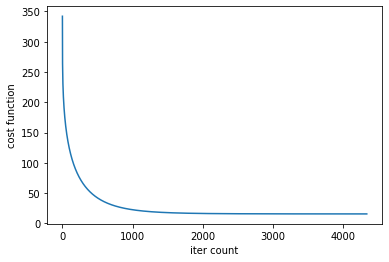

In [22]:
# 对于lambda=10，取出最终结果
theta, _, loss_list = optimizer(10)   
intercept = theta[0, 0]
coef = list(theta[1:, 0])
print("\n截距：", round(intercept,4))
print("系数：", [round(x,4) for x in coef])

# 损失函数走势图
print("\n      ————————损失函数走势图————————")
plt.plot(list(range(len(loss_list))), loss_list)
plt.xlabel("iter count")
plt.ylabel("cost function")
plt.show()

与调用sklearn的岭回归结果比对：

In [23]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=10, random_state=0).fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('testing R2: ', round(r2_score(y_test, y_pred),4))
print('testing RMSE: ', round(mean_squared_error(y_test, y_pred)**0.5,4))

print('截距：',round(reg.intercept_[0], 4))
print('系数：',[round(x,4) for x in list(reg.coef_[0])])


testing R2:  0.8788
testing RMSE:  6.0628
截距： 20.9903
系数： [-2.2357, 0.9361, 0.6194, 0.7404, -0.6493, 1.2035, -0.1651, -0.2573, 0.5817, 0.121, -0.3188, 0.623, -0.1566, 0.6886, -0.6597, -0.4159, 0.1563, 0.5072, 0.3901, -0.5496, -0.5194, -1.2493, 0.7052, 0.9698, -0.4469, -0.3698, 0.4733, 0.4853, 0.2565, -0.5863, -1.2421, 1.1259, 0.9699, -0.3775, -0.1135, 1.1568, 2.5793, -5.1269, 1.2345, 13.4827, 0.1435, 0.1882, -0.1663, -0.2982, -0.019, -0.6084, 0.0084, 0.2233, 0.357, 0.2886, -0.4035, 0.2798, 1.4729, -1.545, -0.3781, 1.0004, 0.4543, 0.1401, -0.9221, 0.293, -0.1327, 0.4535, 0.0119, 0.2873, -0.1313, 0.3643, -0.1011, -0.1874, -0.5923, 0.2863, -0.0866, -0.2599]


与梯度下降的结果基本一致。

### >> 预测test.csv

In [24]:
predict_data.head(11)

,0,1,2,3,4,5,6,7,8,9
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1
5,id_0,NO2,17,14,13,14,18,21,8.9,9.4
6,id_0,NOx,18,16,14,15,20,23,10,10
7,id_0,O3,32,31,31,26,16,12,27,20
8,id_0,PM10,62,50,44,39,38,32,48,36
9,id_0,PM2.5,33,39,39,25,18,18,17,9


In [25]:
new_n = int(predict_data.shape[0] / 18)
new_X_raw = pd.DataFrame(columns=X_col)

# 新的自变量列表格式转换
for i in  range(new_n):
    tmp_data = predict_data.iloc[i*18:(i+1)*18,-4:]
    tmp_row = np.asarray(tmp_data).reshape(1,-1)
    new_X_raw = new_X_raw.append(pd.DataFrame(tmp_row,columns=X_col), ignore_index = True)
new_X_raw

,AMB_TEMP:-4,AMB_TEMP:-3,AMB_TEMP:-2,AMB_TEMP:-1,CH4:-4,CH4:-3,CH4:-2,CH4:-1,CO:-4,CO:-3,...,WIND_DIREC:-2,WIND_DIREC:-1,WIND_SPEED:-4,WIND_SPEED:-3,WIND_SPEED:-2,WIND_SPEED:-1,WS_HR:-4,WS_HR:-3,WS_HR:-2,WS_HR:-1
0,19,19,19,18,1.7,1.7,1.7,1.7,0.53,0.55,...,45,107,1.6,1.6,1.2,1.8,1.2,0.7,1,0.6
1,13,13,13,12,1.8,1.8,1.7,1.7,0.34,0.33,...,93,131,2.2,2,1.7,1.2,2.2,2.1,1.9,1.6
2,32,31,30,29,1.7,1.8,1.7,1.7,0.41,0.45,...,342,63,2.7,2.8,2.4,2.1,2.1,0.6,0.3,0.6
3,14,14,15,15,1.7,1.7,1.7,1.7,0.27,0.2,...,91,116,2.4,2.3,1.7,1,1.7,2.4,1.7,0.9
4,29,30,31,31,1.7,1.7,1.7,1.7,0.19,0.3,...,291,301,1.7,2,1.8,1.8,0.9,1.1,1.4,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,26,26,25,23,1.8,1.8,1.8,1.7,0.59,0.71,...,316,341,1.1,1.5,3.4,1.3,1,1.1,2.4,1.7
236,24,23,22,21,1.7,1.7,1.7,1.8,0.45,0.46,...,89,106,2.5,1.8,0.8,1.4,2.5,1.3,0.4,1.1
237,30,31,31,33,1.8,1.8,1.8,1.7,0.47,0.43,...,314,310,2.7,2.6,2.2,3.4,1.3,1.2,2,1.5
238,11,11,11,13,1.7,1.7,1.8,1.7,0.21,0.3,...,82,303,1.6,1.4,0.6,0.8,1.8,1.6,0.6,0.5


In [26]:
std_new_X = ss.transform(new_X_raw) # 数据标准化
new_X_1 = np.concatenate((np.ones(new_n).reshape((new_n, 1)), std_new_X), axis=1) 

new_y_pred = new_X_1 @ theta

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
id_ = ['id_'+str(x) for x in range(new_n)]

submission = pd.DataFrame(columns=['id','value'])
submission.id, submission.value = id_, new_y_pred
submission.to_csv('E:/0yanjiusheng/2AIML/Homework1/submission.csv',index=False)
submission


,id,value
0,id_0,4.300039
1,id_1,15.076585
2,id_2,29.462090
3,id_3,5.190126
4,id_4,30.926320
...,...,...
235,id_235,51.729809
236,id_236,70.480357
237,id_237,39.486568
238,id_238,11.698832
